In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./data/generator.csv")
df.head()

,ID,RPM,VIBRATION,STATUS
0,1,568,585,good
1,2,586,565,good
2,3,609,536,good
3,4,616,492,good
4,5,632,465,good


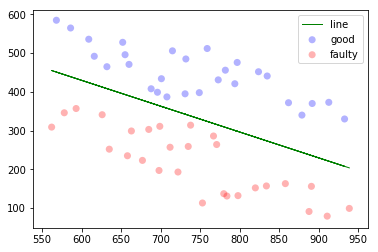

In [3]:
fig, ax = plt.subplots()

color = ["blue", "red"]
status = ["good", "faulty"]
for i in range(2):
    x = df[df["STATUS"] == status[i]]["RPM"]
    y = df[df["STATUS"] == status[i]]["VIBRATION"]
    ax.scatter(x, y, c=color[i], s=50, label=status[i],
                   alpha=0.3, edgecolors='none')


x_line =  df["RPM"]
y_line =  830 - 0.667 * df["RPM"]
ax.plot(x_line, y_line, linestyle="-", color="green", linewidth=1, label="line")


ax.legend()
plt.show()

In [8]:
x_data = df.iloc[:, 1:3].as_matrix()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_label = df.iloc[:, 3].as_matrix()
le.fit(np.unique(y_label))
y_data = le.transform(y_label)

x_data[:3], y_data[:3]

(array([[568, 585],
        [586, 565],
        [609, 536]]), array([1, 1, 1]))

In [9]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x_data, y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
regr.predict(x_data)

array([  1.05856314e+00,   1.02370973e+00,   9.66120163e-01,
         8.15281697e-01,   7.49348117e-01,   1.03361935e+00,
         9.19162092e-01,   8.35784996e-01,   6.60707802e-01,
         6.44796277e-01,   6.26614080e-01,   7.88822723e-01,
         1.09355523e+00,   1.05263689e+00,   7.09256697e-01,
         7.61574640e-01,   1.21639013e+00,   9.41243609e-01,
         1.05646897e+00,   1.16639329e+00,   9.51115412e-01,
         1.13685352e+00,   1.12018650e+00,   9.20094079e-01,
         8.37485080e-01,   9.80760238e-01,   1.03990281e+00,
         9.22427788e-01,  -1.14240215e-03,   1.75487796e-01,
         2.51301583e-01,   2.65731543e-01,  -5.11098276e-02,
        -6.32186858e-02,   1.90719471e-01,  -6.54767525e-02,
         2.55926977e-01,  -1.16245894e-01,   3.18095711e-01,
         1.43005910e-01,  -7.68091088e-02,   2.02908173e-01,
         4.18186047e-01,  -3.09492679e-01,   3.78035795e-01,
         3.03754000e-01,  -1.57109613e-01,  -1.70750464e-01,
        -1.35112143e-01,

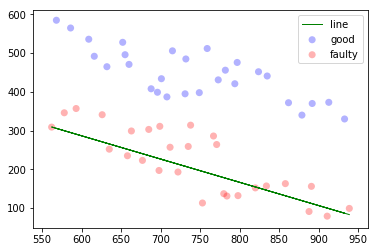

In [11]:
fig, ax = plt.subplots()

color = ["blue", "red"]
status = ["good", "faulty"]
for i in range(2):
    x = df[df["STATUS"] == status[i]]["RPM"]
    y = df[df["STATUS"] == status[i]]["VIBRATION"]
    ax.scatter(x, y, c=color[i], s=50, label=status[i],
                   alpha=0.3, edgecolors='none')


x_line = x_data[:, 0]
y_line = -1 * (regr.intercept_ + regr.coef_[0] *  x_data[:,0]) / regr.coef_[1]
ax.plot(x_line, y_line, color="green", linewidth=1, label="line")


ax.legend()

plt.show()